In [ ]:
#퍼셉트론(perceptron)모델
"""
인공신경망의 전신이지만 제한적인 성능 때문에 한계가 있다.

MLP의 전신

퍼셉트론의 구성요소 : 
 - 노드(node) : 입력(input), 출력(output)
 - 에지(edge) : 가중치(weight)
 - 가중합 연산
 - 활성함수(activation function) : 입력 값이 일정 수준의 역치(threshold, 임계값)를 넘어서면 이를 전달할지 전달하지 않을지를 결정

특징 : 
퍼셉트론은 단일 층 구조라고 간주
이진분류를 목적으로 만들어진 모델

가중합 연산 :
 - z = 가중합 연산
 - x = 입력 값
 - w = 가중치
 - y = 출력값

 입력 값 x 와 w의 bias항 을 추가 한다.
 
 
"""

In [1]:
import numpy as np

In [10]:
class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # 랜덤 시트 생성
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) # 가중치 백터의 길이는 m+1
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        #dotproduct 연산을 위해서 (n,m)행렬과 vias 부분을 제외한 w_를 계산후 vias를 + 한다
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [4]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL : ', s)

df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.tail()

URL :  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
y = df.iloc[0 : 100,4].values
y = np.where(y=='Iris-setosa', -1,1)

X = df.iloc[0:100 ,[0, 2]].values

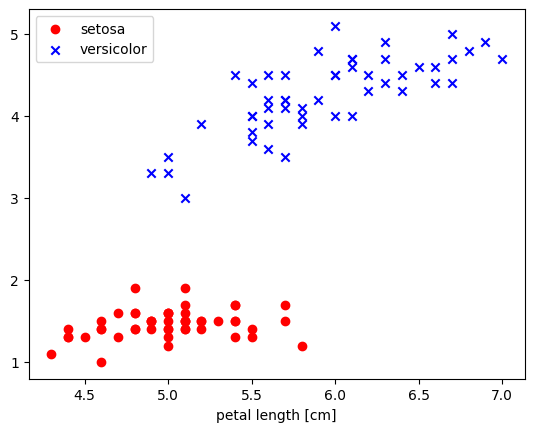

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.legend(loc = 'upper left')

plt.show()

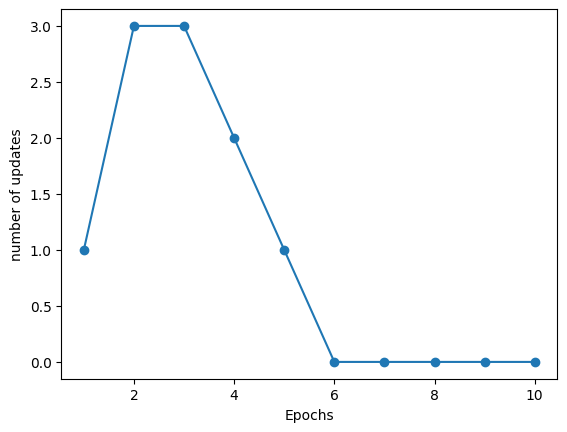

In [12]:
ppn = Perceptron(n_iter = 10 , eta=0.01)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('number of updates')

plt.show()

/var/folders/06/sz8430vs1nq5fpt6zfb04knh0000gn/T/ipykernel_54329/2591946145.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


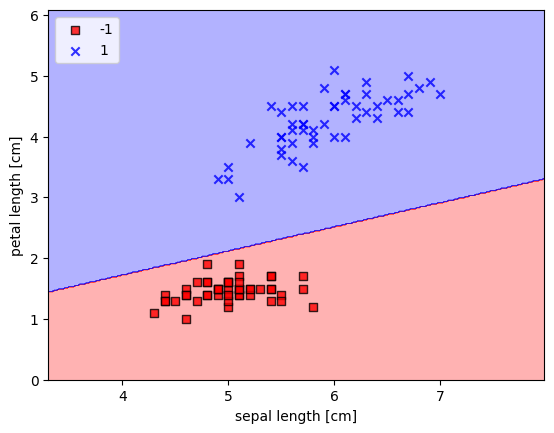

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 꽃잎 길이 최소/최대
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()